LAB 3: Middle Checkpoint Demo
====================================


## The Basics (Libraries, Modules and Getting the Data)

Here we import our version of tensorflow and other modules that we may use in the future. We basically followed the same procedures we went through for lab 2 in order to create our model for the MNIST given for the ASL online. The sources we used for the MNIST was https://www.kaggle.com/datasets/datamunge/sign-language-mnist. This data gave us access to the csv test and train models which we could verify and then create a model from tensorflow to later be applied on edge devices such as Raspberry Pi 4 and Arducam in the future checkpoints so that we can finally create an IoT device feature to recognize ASL.

In [1]:
# import tensorflow
# and check version
import tensorflow as tf
tf.__version__

'2.10.0'

In [2]:
# import libraries and utilites
import matplotlib.pyplot as plt
import numpy as np 
import random
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [5]:
# load models
train = pd.read_csv('/Users/sungmincho/Desktop/ECE479/ece479github/InclusiveIoT/mnist/sign_mnist_test.csv')
test = pd.read_csv('/Users/sungmincho/Desktop/ECE479/ece479github/InclusiveIoT/mnist/sign_mnist_train.csv')

# as numpy array
train_data = np.array(train, dtype='float32')
test_data = np.array(test, dtype='float32')

# check shape
print("Shape of train data:", np.shape(train_data))
print("Shape of test data:", np.shape(test_data))

Shape of train data: (7172, 785)
Shape of test data: (27455, 785)


## Validating Models and Dataset

In this part of the lab, we first decided on how to plot our dataset as well as how it was modeled. We did this by graphing and visualizing the dataset itself in order to get a grasp on how we could use the given data and apply to ours later in the lab.

Label for the image is:  T
Label for the image is:  E
Label for the image is:  H


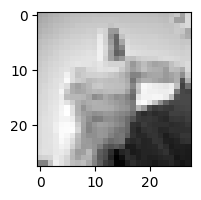

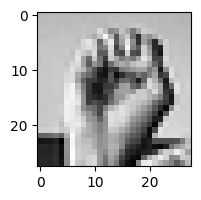

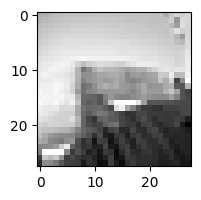

In [6]:
# class names for English Alphabet
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# checking if plotting images work
for i in range(3):
    i = random.randint(1, train.shape[0])
    fig1, ax1 = plt.subplots(figsize=(2,2))

    plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray')
    print('Label for the image is: ', class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

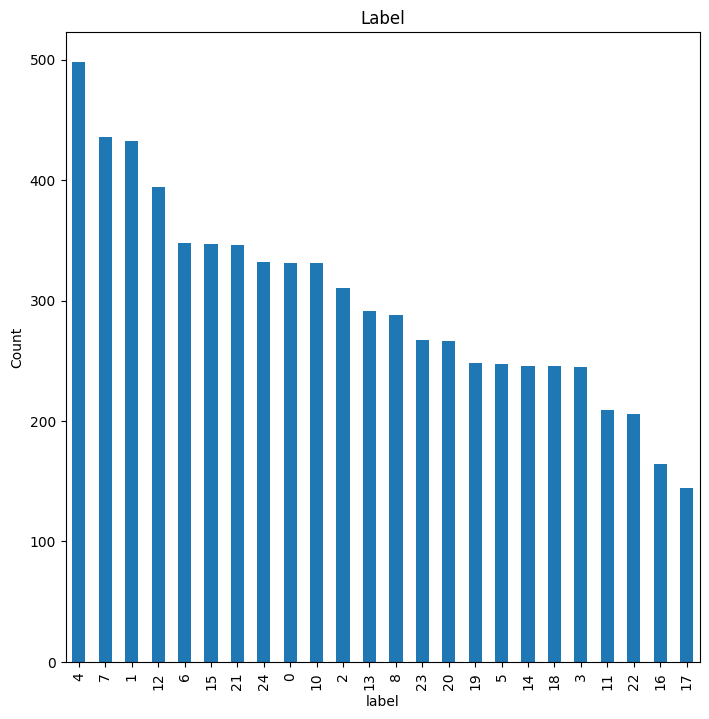

In [7]:
# data distribution
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
# plot train
train['label'].value_counts().plot(kind='bar', ax=ax1)

ax1.set_ylabel('Count')
ax1.set_title('Label')

In [8]:
# normalize train data accordingly
x_train = train_data[:, 1:]/255
x_test = test_data[:, 1:]/255

y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

# now test data
y_test = test_data[:, 0]
y_test_cat = to_categorical(y_test, num_classes=25)

x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))

## Constructing the Model

In this part of the lab, we now build the model for the data. This is done by the similar steps seen in lab 2. We also used these sources mainly: https://www.youtube.com/watch?v=WvoLTXIjBYU and https://studentsxstudents.com/build-a-sign-language-image-classifier-with-me-c6166b12dc4f.

In [9]:
# construct the model using tensorflow
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
# output layer of 25 outputs
model.add(Dense(25, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [10]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

## Train the Model

In [11]:
history = model.fit(x_train, y_train_cat, batch_size = 128, epochs=10, verbose=1, validation_data=(x_test, y_test_cat))

Epoch 1/10


2024-05-05 23:38:23.971008: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


57/57 [==============================] - 3s 43ms/step - loss: 3.1523 - acc: 0.0767 - val_loss: 3.1783 - val_acc: 0.0452
Epoch 2/10
57/57 [==============================] - 2s 40ms/step - loss: 2.7876 - acc: 0.1785 - val_loss: 2.4763 - val_acc: 0.2223
Epoch 3/10
57/57 [==============================] - 2s 41ms/step - loss: 1.8970 - acc: 0.4017 - val_loss: 1.9292 - val_acc: 0.3857
Epoch 4/10
57/57 [==============================] - 2s 41ms/step - loss: 1.3583 - acc: 0.5566 - val_loss: 1.5859 - val_acc: 0.4930
Epoch 5/10
57/57 [==============================] - 2s 42ms/step - loss: 1.0258 - acc: 0.6552 - val_loss: 1.4825 - val_acc: 0.5177
Epoch 6/10
57/57 [==============================] - 2s 42ms/step - loss: 0.8111 - acc: 0.7243 - val_loss: 1.3853 - val_acc: 0.5643
Epoch 7/10
57/57 [==============================] - 2s 43ms/step - loss: 0.6656 - acc: 0.7803 - val_loss: 1.2568 - val_acc: 0.6266
Epoch 8/10
57/57 [==============================] - 2s 44ms/step - loss: 0.5224 - acc: 0.8203 

/var/folders/5m/czfzttmd0cn_4blxpr47148r0000gn/T/ipykernel_3926/1563448400.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'b', label='Training accuracy', color='red')


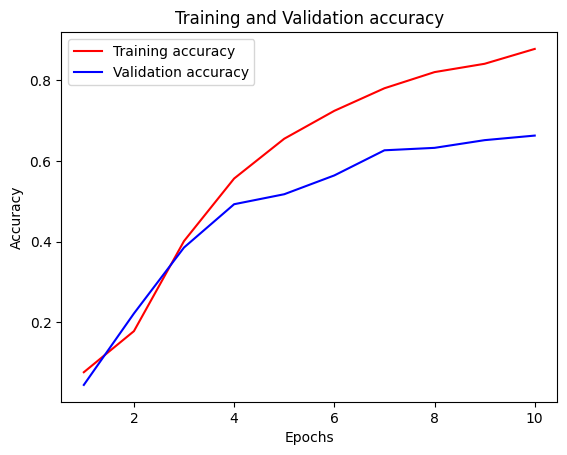

In [13]:
# Access accuracy history
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

# Create an array for epochs
epochs = range(1, len(accuracy) + 1)

# Plotting accuracy
plt.plot(epochs, accuracy, 'b', label='Training accuracy', color='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()


In [ ]:
# Load the SavedModel
saved_model_dir = '/Users/sungmincho/Desktop/ECE479/lab2/saved'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

# Optimize for dynamic range quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('dynamic_range_quantization.tflite', 'wb') as f:
    f.write(tflite_model)
    
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# use full int quant 
def representative_data_gen():
    for input_value in train_images[:100]:  # Using first 100 images as representative data
        yield [input_value.reshape(1, 28, 28, 1).astype(np.float32)]  # Reshape input to match model input shape

# convert the saved_model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

converter.representative_dataset = representative_data_gen

tflite_model = converter.convert()

# Save the TFLite model to a file
with open('full_integer_quantization.tflite', 'wb') as f:
    f.write(tflite_model)


## To-dos for the Future

In this checkpoint, we were able to accomplish the basics things for the future of our project. We were able to find a useful and trustworthy source for MNIST of ASL that we can use for our project. The training accuracy is pretty low at this point of the project; however, we plan to improve this in the future by improving the model we constructed and also re-validating the data to ensure there are no outliers we could find.

From the Lab 3 Proposal, we proposed to: "For the deliverable for the middle checkpoint demo, we will present a working trained model that correctly outputs depending on a sequence of sign language input. We will also take some suggestions and advice from the TAs, in order to improve the existing model for the final presentation." In this checkpoint, we were able to do all of this. So in the future, we plan to apply this trained model (hopefully improved with better accuracies) on both Raspberry Pi 4 and ArduCam to use recognize our own data. We also plan to see how we'll tackle videos as well.